## Run the provided example from meteostat

- changed the location to Salzburg instead of Vancouver
- changed the date range to 2010 instead of 2018

...to familiarize myself with the code and variables first

In [54]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import meteostat as mts

import geopandas

# Set time period
start = datetime(2010, 1, 1)
end = datetime(2010, 12, 31)

# Create Point for Salzburg
location = Point(47.2497, 13.1193)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()


ModuleNotFoundError: No module named 'geopandas'

The output did not display any data, since I did not know  about the exact coordinates of the weather station in Salzburg.

## Fetching Infos about weather stations within a certain area

this is one way to get the desired metadata (I was looking for the exact coordinates of the Salzburg weather station)

In [55]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(47.7972, 13.0477)
station = stations.fetch(1)

# Print DataFrame
print(station)

                      name country region    wmo  icao  latitude  longitude  \
id                                                                            
11350  Salzburg / Freisaal      AT     SZ  11350  <NA>   47.7833      13.05   

       elevation       timezone hourly_start hourly_end daily_start daily_end  \
id                                                                              
11350      420.0  Europe/Vienna          NaT        NaT         NaT       NaT   

      monthly_start monthly_end     distance  
id                                            
11350           NaT         NaT  1555.130874  


## Run the Salzburg example

now I used the coordinates from Salzburg/Freisaal to generate the diagram.
I also changed the plotted data to only display the average temperature.

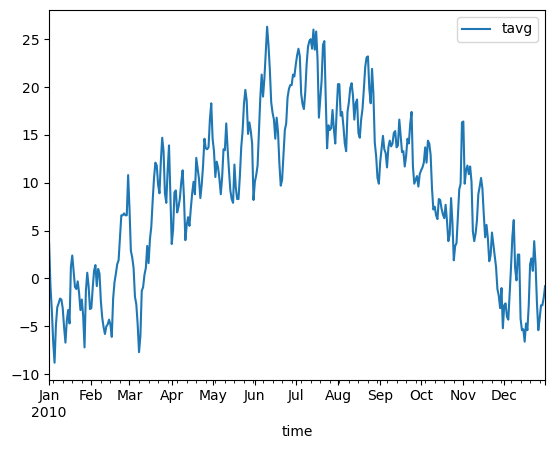

In [56]:
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 1, 1)
end = datetime(2010, 12, 31)

# Create Point for Salzburg
location = Point(47.7833, 13.05)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg'])
plt.show()

## Getting more metadata

I also wanted to find out more about the data available in the library meteostat. Therefore I importet the whole library and used the command help to display more infos

In [57]:
import meteostat as mts

In [58]:
help(mts)

Help on package meteostat:

NAME
    meteostat

DESCRIPTION
    █▀▄▀█ █▀▀ ▀█▀ █▀▀ █▀█ █▀ ▀█▀ ▄▀█ ▀█▀
    █░▀░█ ██▄ ░█░ ██▄ █▄█ ▄█ ░█░ █▀█ ░█░

    A Python library for accessing open weather and climate data

    Meteorological data provided by Meteostat (https://dev.meteostat.net)
    under the terms of the Creative Commons Attribution-NonCommercial
    4.0 International Public License.

    The code is licensed under the MIT license.

PACKAGE CONTENTS
    core (package)
    enumerations (package)
    interface (package)
    series (package)
    units
    utilities (package)

DATA
    __appname__ = 'meteostat'

VERSION
    1.6.7

FILE
    c:\users\isabe\miniconda3\envs\softdev_navigator\lib\site-packages\meteostat\__init__.py




In [36]:
##### more info: https://dev.meteostat.net/python/stations.html#data-structure

## Importing and testing out basics of folium

furthermore, I wanted to try out not only climate data and visualising it in a diagram, but also testing out the visualization of maps. I did so with folium

In [61]:
import folium

In [62]:
m = folium.Map(width=900, height=500, location=[47.7833, 13.05], zoom_start=12, tiles="CartoDB positron")
m

here I tried to set a marker to the location of the weather station

In [63]:
salzburg = [47.7833, 13.05]

folium.Marker(location=salzburg).add_to(m)

m

## Checking further data form meteostat

first i used the same code as before and tried (by looking in the github documentation of meteostat) to display other weather data.

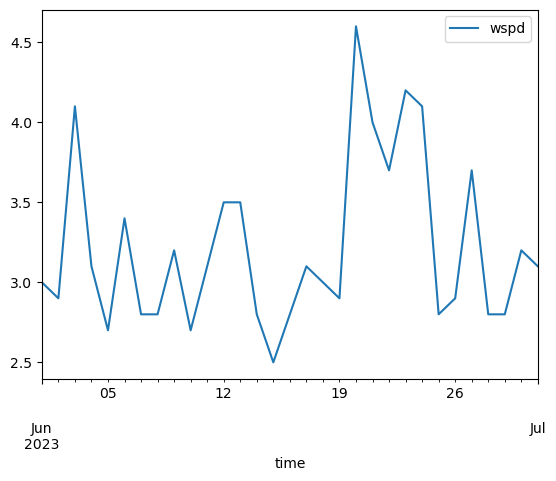

In [64]:
# Set time period
start = datetime(2023, 6, 1)
end = datetime(2023, 7, 1)

# Create Point for Salzburg
vancouver = Point(47.7833, 13.05)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd'])
plt.show()

## Testing out another type of diagram / data viz 

since my goal for the main project is to figure out how to fetch and display data, I played around and managed to create a bar chart of the rain.

I also managed to display a title and shorten the Labels of the x-Axis (since they were too long, also displaying the time)

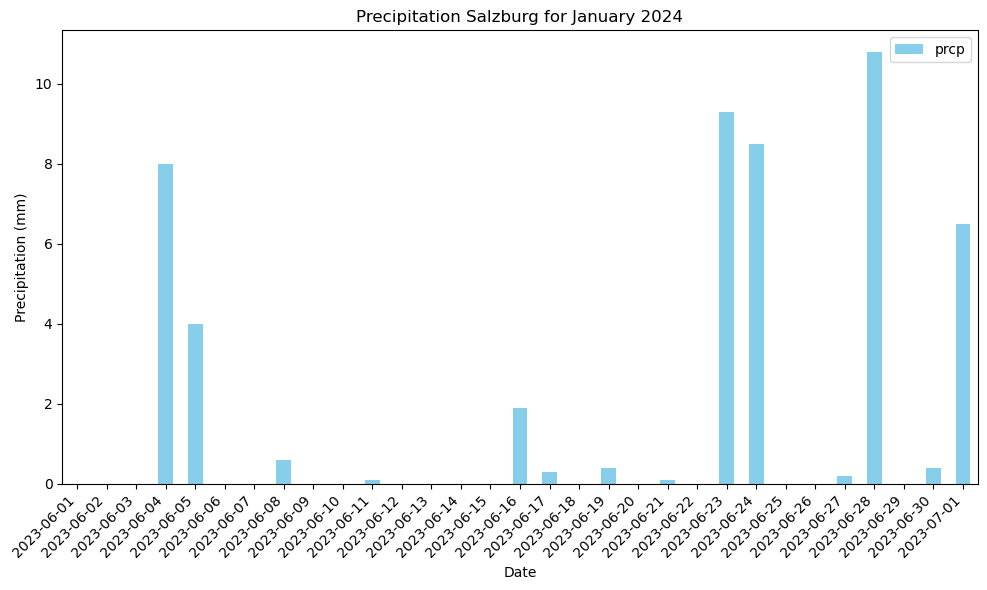

In [66]:
# Plot bar chart for precipitation over two months per day
data.plot(kind='bar', y='prcp', figsize=(10, 6), color='skyblue')
plt.title('Precipitation Salzburg for January 2024')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: data.index[int(x)].strftime('%Y-%m-%d')))
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Since I have no experience in Python at all and have never worked with libraries, I was quite happy with the output so far.

## Creating a Bar chart and individualizing the visualization

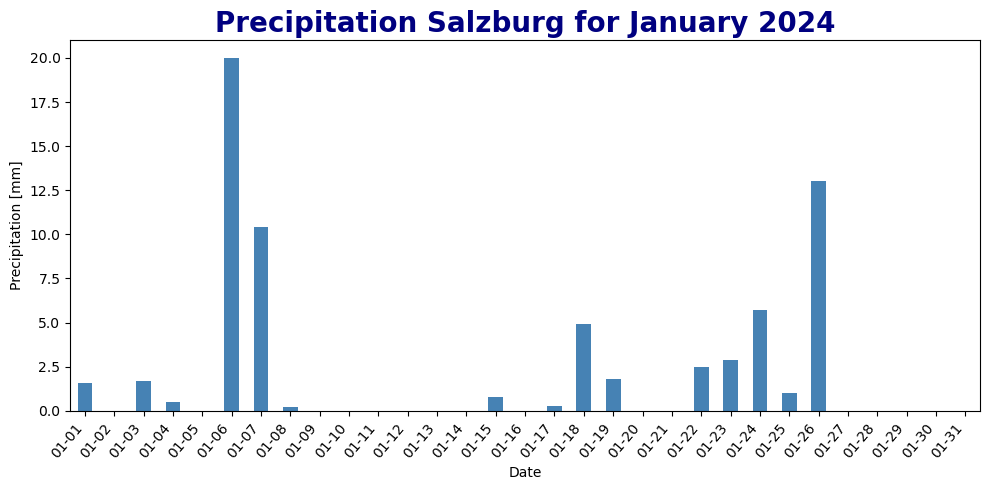

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from meteostat import Daily, Point
import datetime

# Define the location and time period
location = Point(47.81, 13.04, 424)  # Coordinates for Salzburg, Austria
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 1, 31)

# Fetch daily weather data
data = Daily(location, start, end)
data = data.fetch()

# Plot bar chart for precipitation
data['prcp'].plot(kind='bar', figsize=(10, 5), color='steelblue')
title_font = {'size': 20, 'color': 'navy', 'weight': 'bold'}
plt.title('Precipitation Salzburg for January 2024', fontdict=title_font)
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]')
plt.xticks(rotation=50, ha='right')


# Format x-axis labels
formatter = FuncFormatter(lambda x, _: data.index[int(x)].strftime('%m-%d'))
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Creating a Spider Chart

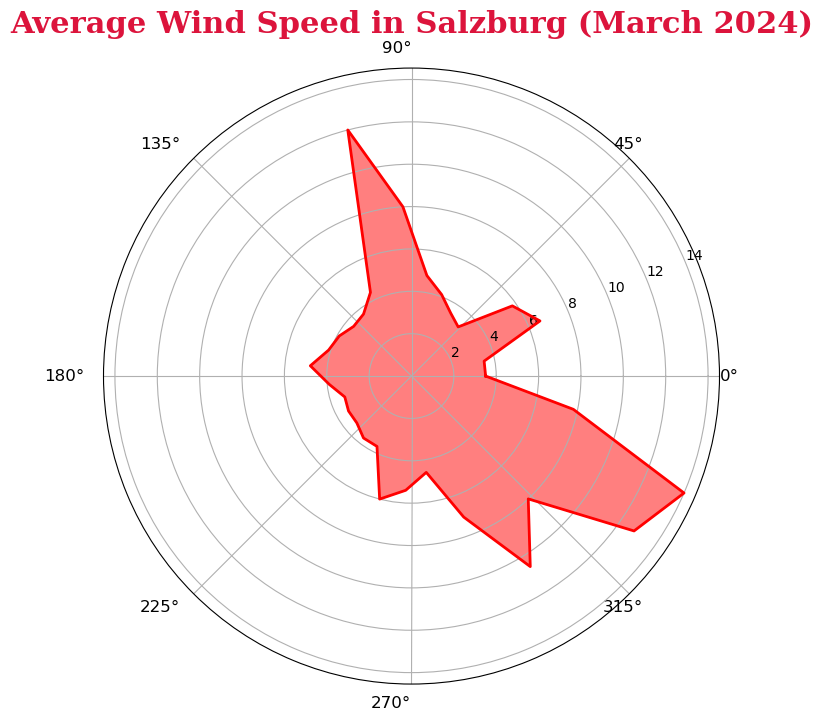

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Hourly, Point
import datetime
import numpy as np

# Define the location and time period
location = Point(47.81, 13.04, 424)  # Coordinates for Salzburg, Austria
start = datetime.datetime(2024, 3, 1)
end = datetime.datetime(2024, 3, 31)

# Fetch hourly weather data
data = Daily(location, start, end)
data = data.fetch()

# Average wind speed by day
data_daily = data.resample('D').mean()

# Prepare data for the spider chart
num_days = len(data_daily)
angles = np.linspace(0, 2 * np.pi, num_days, endpoint=False).tolist()
angles += angles[:1]

wind_speeds = data_daily['wspd'].tolist()
wind_speeds += wind_speeds[:1]

# Plot spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, wind_speeds, color='red', linewidth=2, linestyle='solid')
ax.fill(angles, wind_speeds, color='red', alpha=0.5)

# Ensure that the number of ticks and labels match
ax.set_xticks(np.linspace(0, 2 * np.pi, num=8, endpoint=False))
ax.set_xticklabels(['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°'], fontsize=12, rotation=0, ha='right')

ax.set_title('Average Wind Speed in Salzburg (March 2024)', color='crimson', weight='bold', fontfamily='serif', fontsize='22')

# Show the plot
plt.show()



In [120]:
print(data)

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-03-01   6.0   2.3   9.2   1.9   0.0  353.0   3.5  11.1  1007.7   NaN
2024-03-02   8.1   4.7  14.0   0.0   0.0  153.0   3.5  14.8  1006.1   NaN
2024-03-03  10.6   3.3  18.8   0.0   0.0  168.0   6.6  25.9  1001.2   NaN
2024-03-04   9.4   6.1  13.6   0.0   0.0  270.0   5.8  22.2  1008.0   NaN
2024-03-05   8.0   5.2  10.2   0.2   0.0  234.0   3.2  13.0  1014.6   NaN
2024-03-06   5.1   4.0   6.4   0.5   0.0  313.0   3.5  11.1  1019.1   NaN
2024-03-07   4.7   0.6   7.1   3.7   0.0  357.0   4.1  13.0  1020.8   NaN
2024-03-08   5.1  -1.0  11.8   0.0   0.0  151.0   4.8  16.7  1013.4   NaN
2024-03-09   9.8   4.6  16.0   0.0   0.0  165.0   8.0  18.5  1004.5   NaN
2024-03-10  13.4  10.0  17.1   0.0   0.0  159.0  12.0  35.2   995.9   NaN
2024-03-11   9.3   6.6  12.1   0.0   0.0  315.0   4.4  16.7  1006.2   NaN
2024-03-12   7.1   5.5   8.9   3.5   0